# AI/ML Task

 Develop a machine learning model to detect fraudulent transactions using a Kaggle dataset  
 **Kaggle Credit Card Fraud Detection dataset**   with a focus on data handling, model training, evaluation, and explainability.

## Task 1: Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
print("Dataset Info: ", data.info())
print("\nClass Distribution: ", data['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Feature Scaling for 'Amount' (normalize)
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [5]:
# Split Features and Target
X = data.drop(columns=['Class'])
y = data['Class']

In [8]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


## Task 2: Supervised Model Development


In [10]:
# Importing necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85149
           1       0.98      0.97      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



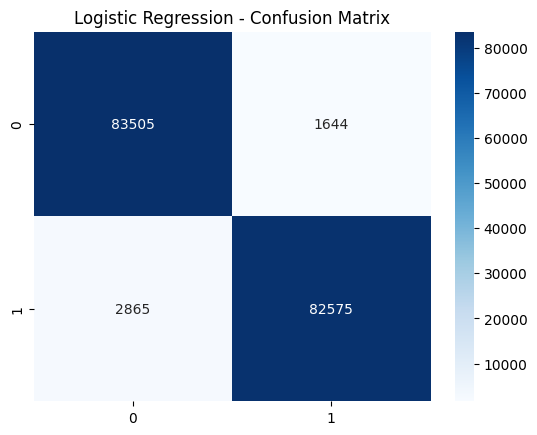

In [13]:
# Logistic Regression

# Spliting Data into Train-Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Training Logistic Regression (Baseline Model)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluating Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:52:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



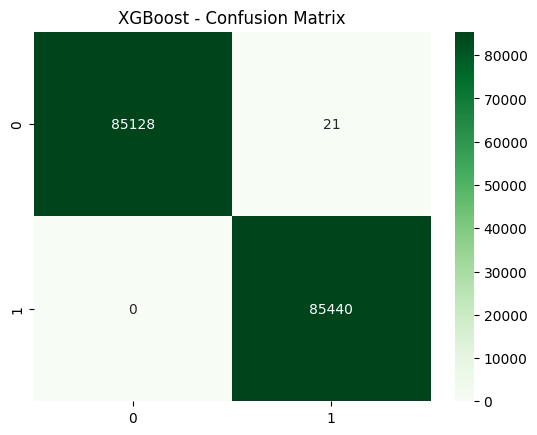

In [14]:
# XGBoost Model

# Training XGBoost Model
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating XGBoost Model
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix for XGBoost
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.show()

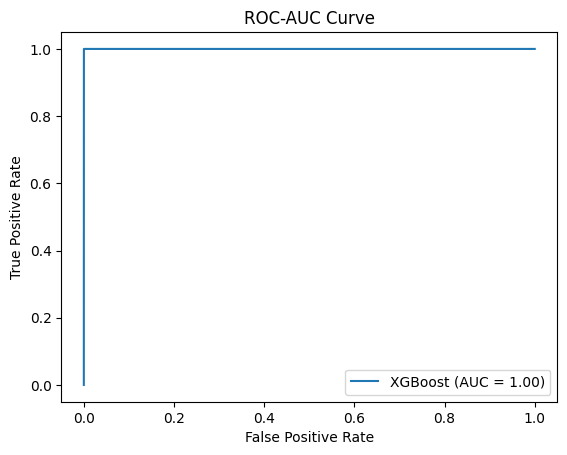

In [15]:
# ROC-AUC Curve for XGBoost
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

## Task 3: Unsupervised Model Development

In [16]:
from sklearn.ensemble import IsolationForest

In [17]:
# Training Isolation Forest Model
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
data['Anomaly'] = isolation_forest.fit_predict(X)
data['Anomaly'] = data['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

In [18]:
# Evaluating Anomalies
anomalies_detected = data[data['Anomaly'] == 1]
print(f"Total Anomalies Detected: {len(anomalies_detected)}")
print("Sample Anomalies:", anomalies_detected.head())

Total Anomalies Detected: 2849
Sample Anomalies:       Time        V1         V2        V3        V4        V5        V6  \
164  103.0 -6.093248 -12.114213 -5.694973  3.294389 -1.413792  4.776000   
362  266.0 -2.564961   2.470985  2.649417 -1.564256  1.794297 -0.614742   
401  290.0 -5.166299  -5.449369  2.988498  2.658991  1.948152 -0.854470   
455  333.0 -2.977214   0.781748  2.881724 -1.627798 -1.368067  1.656876   
601  454.0 -3.133891   2.887394  2.178690 -1.576535  1.434510 -0.687313   

           V7        V8        V9  ...       V22       V23       V24  \
164  4.808426 -0.228197 -0.525896  ... -2.264037 -3.553381  1.215279   
362  4.185906 -3.855359  5.436633  ... -0.463149 -0.532466  0.306494   
401 -0.326394 -1.017364  1.983901  ...  1.172278  3.150413  0.574081   
455 -1.185053 -5.393736  1.719407  ... -1.929181  0.190843  0.533134   
601  3.816056 -3.416915  5.459274  ... -0.498518 -0.476668  0.302196   

          V25       V26       V27       V28     Amount  Class  Anom

Fraud Cases Detected by Isolation Forest: 289


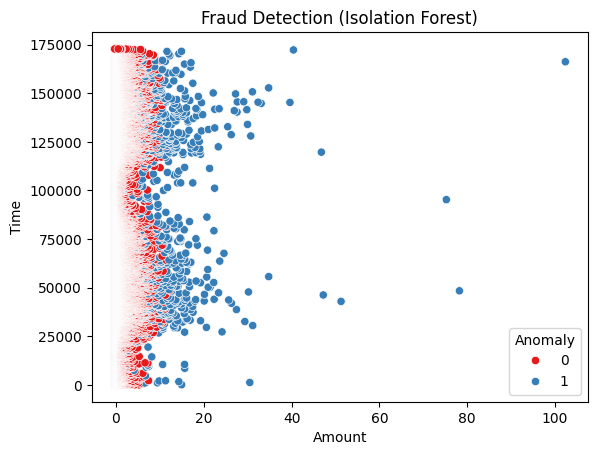

In [19]:
# Compare with Actual Fraudulent Transactions
fraud_data = data[data['Class'] == 1]
common_cases = fraud_data[fraud_data['Anomaly'] == 1]

print(f"Fraud Cases Detected by Isolation Forest: {len(common_cases)}")

# Visualize Anomalies
sns.scatterplot(data=data, x='Amount', y='Time', hue='Anomaly', palette='Set1')
plt.title("Fraud Detection (Isolation Forest)")
plt.show()

## Task 4: Model Evaluation

In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

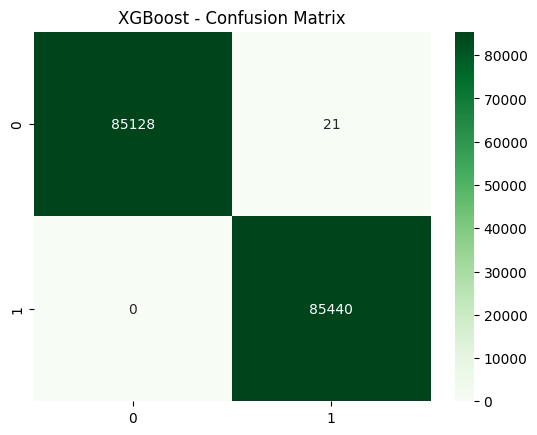

In [21]:
# Confusion Matrix for XGBoost
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.show()

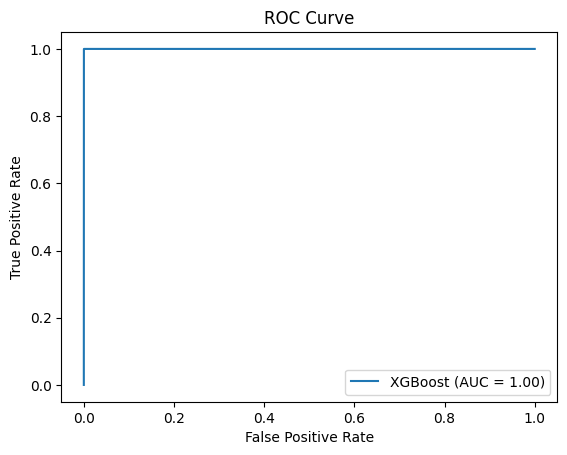

In [22]:
# ROC Curve for XGBoost
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Task 5: Model Explainability

In [23]:
import shap

100%|===================| 170577/170589 [19:40<00:00]       

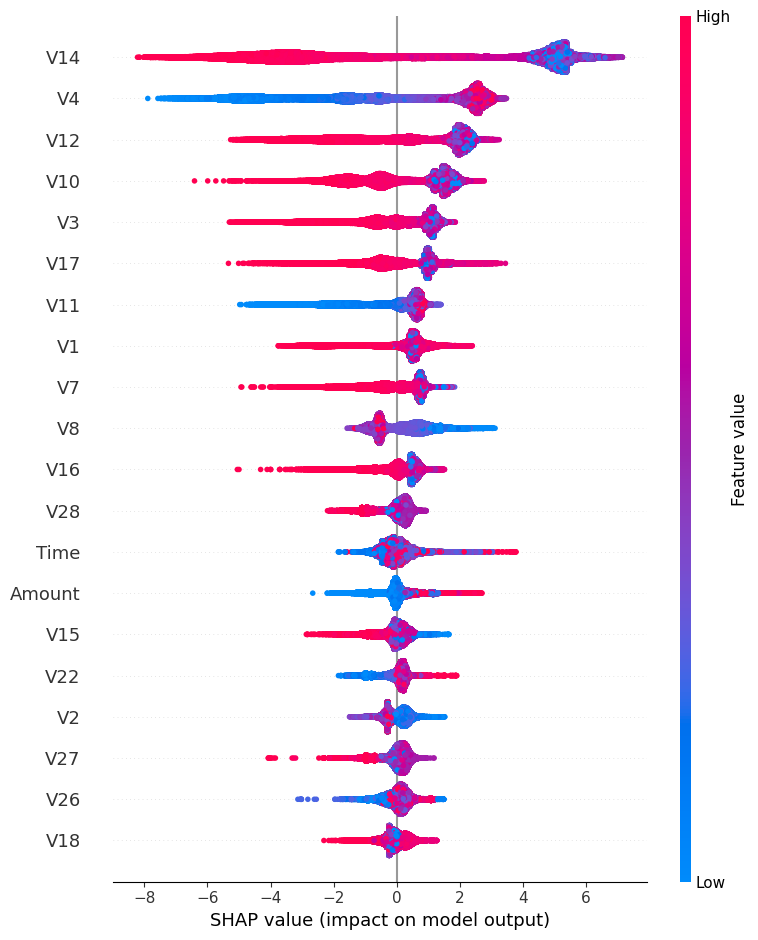

In [24]:
# SHAP for XGBoost
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

# Plotting SHAP Summary
shap.summary_plot(shap_values, X_test)

In [25]:
# Feature Importance for XGBoost
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Features:")
print(feature_importances.head())

Top Features:
   Feature  Importance
14     V14    0.688492
4       V4    0.050049
12     V12    0.040676
17     V17    0.029336
3       V3    0.017889
